In [ ]:
import pandas as pd
import io
import numpy as np


import matplotlib.pyplot as plt

import plotly
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import VarianceThreshold, f_classif, SelectKBest, RFE
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, r2_score, f1_score, classification_report, confusion_matrix

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

import statsmodels.api as sm

from collections import defaultdict

In [ ]:
!pip install openpyxl
from google.colab import files

uploaded = files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving student-mat.csv to student-mat.csv


In [ ]:
!pip install openpyxl
from google.colab import files

uploaded1 = files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving student-por.csv to student-por.csv


In [ ]:
#Importing Data
import pandas as pd
pd.set_option('display.max_columns',None)
df_mat = pd.read_csv('student-mat.csv',sep=';')
df_por = pd.read_csv('student-por.csv',sep=';')

In [ ]:
#Merging Two Datasets
df = pd.concat([df_mat, df_por])

In [ ]:
#Creating The Total Grade Column
df['total grade'] = (df['G1']+df['G2']+df['G3'])/3


In [ ]:
#Showing The Length of The Data
print("\nThe Length of The Data: ", len(df))


The Length of The Data:  1044


In [ ]:
#Showing The Shape of The Data
print("\nThe Shape of The Data: ", df.shape)


The Shape of The Data:  (1044, 34)


In [ ]:
#Showing The Information of The Data
print("\nThe Information of The Data: ")
print(df.info())


The Information of The Data: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       1044 non-null   object 
 1   sex          1044 non-null   object 
 2   age          1044 non-null   int64  
 3   address      1044 non-null   object 
 4   famsize      1044 non-null   object 
 5   Pstatus      1044 non-null   object 
 6   Medu         1044 non-null   int64  
 7   Fedu         1044 non-null   int64  
 8   Mjob         1044 non-null   object 
 9   Fjob         1044 non-null   object 
 10  reason       1044 non-null   object 
 11  guardian     1044 non-null   object 
 12  traveltime   1044 non-null   int64  
 13  studytime    1044 non-null   int64  
 14  failures     1044 non-null   int64  
 15  schoolsup    1044 non-null   object 
 16  famsup       1044 non-null   object 
 17  paid         1044 non-null   object 
 18  activities   1044 

In [ ]:
#Showing The Statistical Calculations
print("\nThe Statistical Calculations: ")
print(df.describe().T)


The Statistical Calculations: 
              count       mean       std        min        25%        50%  \
age          1044.0  16.726054  1.239975  15.000000  16.000000  17.000000   
Medu         1044.0   2.603448  1.124907   0.000000   2.000000   3.000000   
Fedu         1044.0   2.387931  1.099938   0.000000   1.000000   2.000000   
traveltime   1044.0   1.522989  0.731727   1.000000   1.000000   1.000000   
studytime    1044.0   1.970307  0.834353   1.000000   1.000000   2.000000   
failures     1044.0   0.264368  0.656142   0.000000   0.000000   0.000000   
famrel       1044.0   3.935824  0.933401   1.000000   4.000000   4.000000   
freetime     1044.0   3.201149  1.031507   1.000000   3.000000   3.000000   
goout        1044.0   3.156130  1.152575   1.000000   2.000000   3.000000   
Dalc         1044.0   1.494253  0.911714   1.000000   1.000000   1.000000   
Walc         1044.0   2.284483  1.285105   1.000000   1.000000   2.000000   
health       1044.0   3.543103  1.424703   1

In [ ]:
#Showing The Unique Data
print("\nThe Unique Data: ")
print(df.nunique())


The Unique Data: 
School                          2
Sex                             2
Age                             8
Address                         2
Family Size                     2
Parent Cohabitation Status      2
Mother Education                5
Father Education                5
Mother Job                      5
Father Job                      5
Reason                          4
Guardian                        3
Travel Time                     4
Study Time                      4
Failures                        4
Extra Educational Support       2
Family Educational Support      2
Extra Paid Course               2
Extracurricular Activities      2
Attending Nursery School        2
Wants To Take Higher Ed         2
Internet Access                 2
Romantic Relationship           2
Family Relationship             5
Free Time After School          5
Going Out With Friends          5
Workday Alcohol Consumption     5
Weekend Alcohol Consumption     5
Current Health Status        

In [ ]:
df.columns = df.columns.str.capitalize()
df.rename(columns={'Famsize': 'Family Size',
                   'Pstatus': 'Parent Cohabitation Status',
                   'Medu': 'Mother Education',
                   'Fedu': 'Father Education',
                   'Mjob': 'Mother Job',
                   'Fjob': 'Father Job',
                   'Traveltime': 'Travel Time',
                   'Studytime': 'Study Time',
                   'Schoolsup': 'Extra Educational Support',
                   'Famsup': 'Family Educational Support',
                   'Paid': 'Extra Paid Course',
                   'Activities': 'Extracurricular Activities',
                   'Nursery': 'Attending Nursery School',
                   'Higher': 'Wants To Take Higher Ed',
                   'Internet': 'Internet Access',
                   'Romantic': 'Romantic Relationship',
                   'Famrel': 'Family Relationship',
                   'Freetime': 'Free Time After School',
                   'Goout': 'Going Out With Friends',
                   'Dalc': 'Workday Alcohol Consumption',
                   'Walc': 'Weekend Alcohol Consumption',
                   'Health': 'Current Health Status',
                   'Absences': 'Number of School Absences',
                   'Total grade': 'Total Grade'}, inplace=True)

<ipython-input-86-f4c877ffd996>:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-86-f4c877ffd996>:7: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



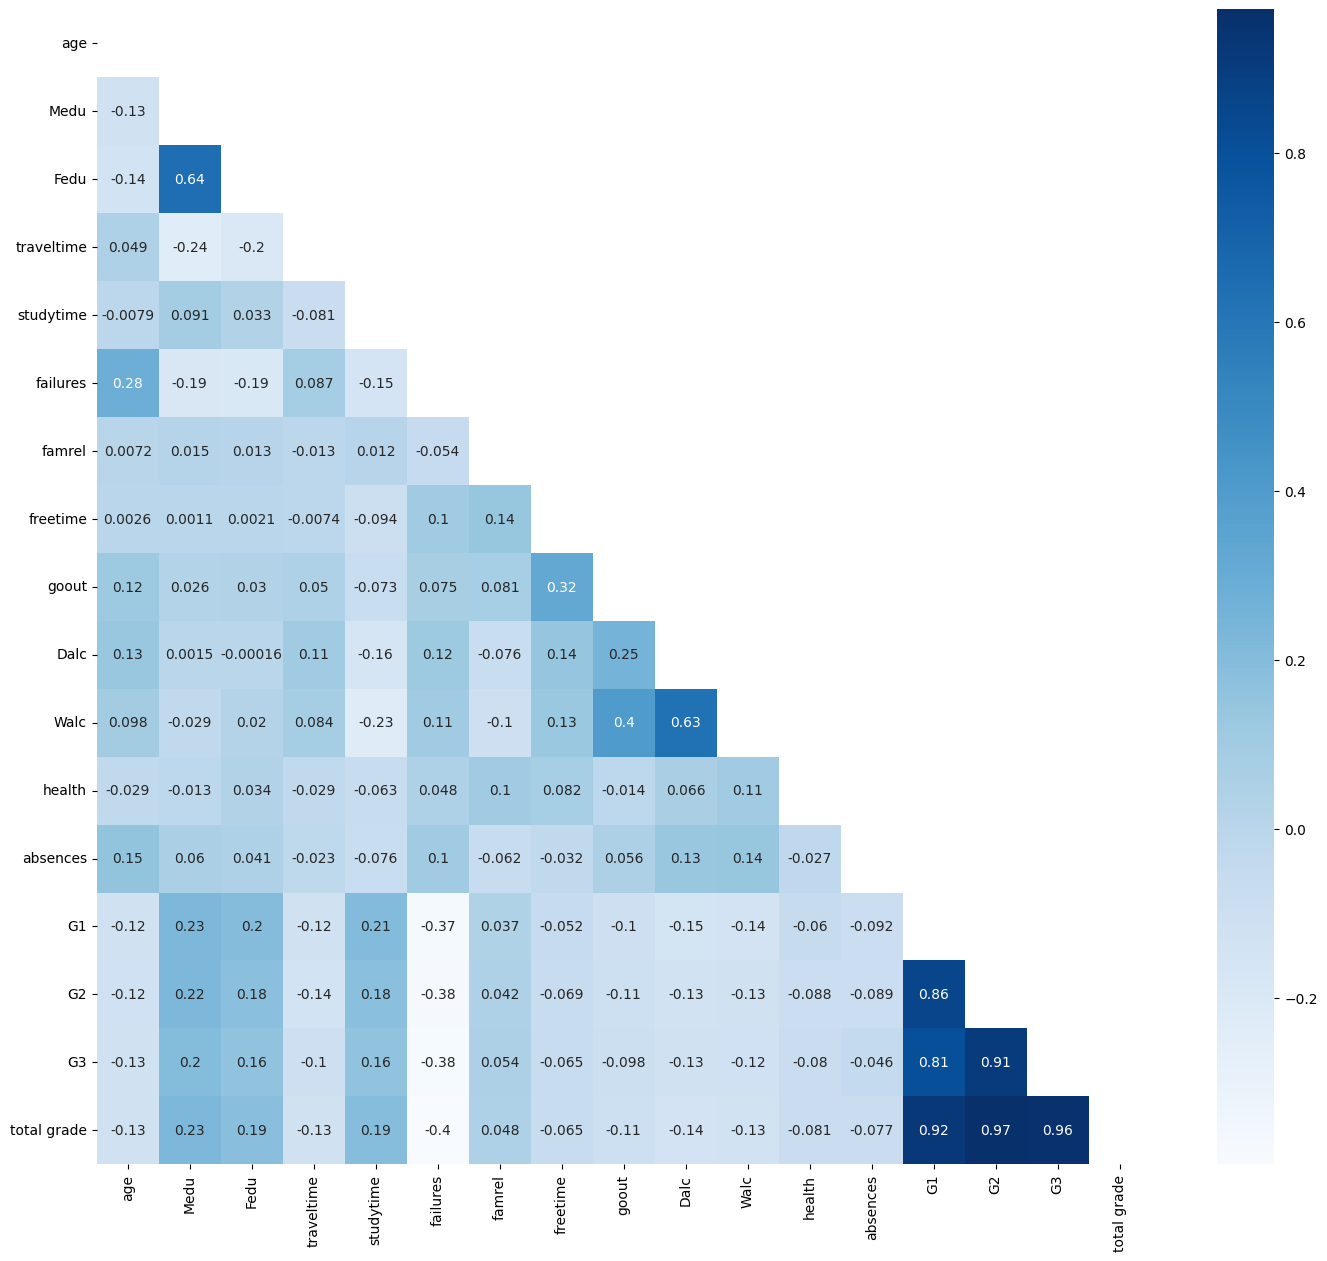

In [ ]:
#Looking For A Correlation
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(17, 15))
corr_mask = np.triu(df.corr())
h_map = sns.heatmap(df.corr(), mask=corr_mask, annot=True, cmap='Blues')
plt.yticks(rotation=360)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Looking For The Missing Value in Each Column
print("\nLooking For The Missing Value in Each Column: ")
print(df.isnull().sum())


Looking For The Missing Value in Each Column: 
School                         0
Sex                            0
Age                            0
Address                        0
Family Size                    0
Parent Cohabitation Status     0
Mother Education               0
Father Education               0
Mother Job                     0
Father Job                     0
Reason                         0
Guardian                       0
Travel Time                    0
Study Time                     0
Failures                       0
Extra Educational Support      0
Family Educational Support     0
Extra Paid Course              0
Extracurricular Activities     0
Attending Nursery School       0
Wants To Take Higher Ed        0
Internet Access                0
Romantic Relationship          0
Family Relationship            0
Free Time After School         0
Going Out With Friends         0
Workday Alcohol Consumption    0
Weekend Alcohol Consumption    0
Current Health Status       

# **now we start to check and visualization the varibles.**

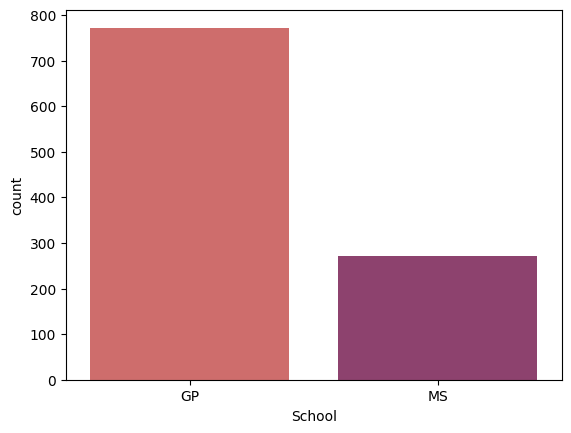

In [ ]:
#Checking The School Column
sns.countplot(x='School', data=df, palette='flare')
plt.show()

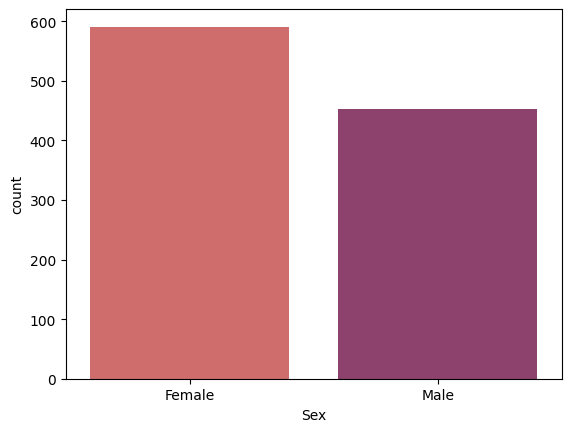

In [ ]:
#Checking The Sex Column
mask_sex = {'F':'Female',
            'M':'Male'}
df['Sex'] = df['Sex'].map(mask_sex)
sns.countplot(x=df['Sex'], palette='flare')
plt.show()

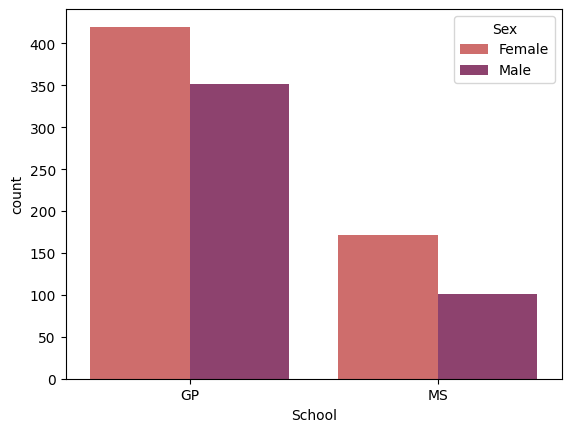

In [ ]:
sns.countplot(x='School', hue='Sex', data=df, palette='flare')
plt.show()

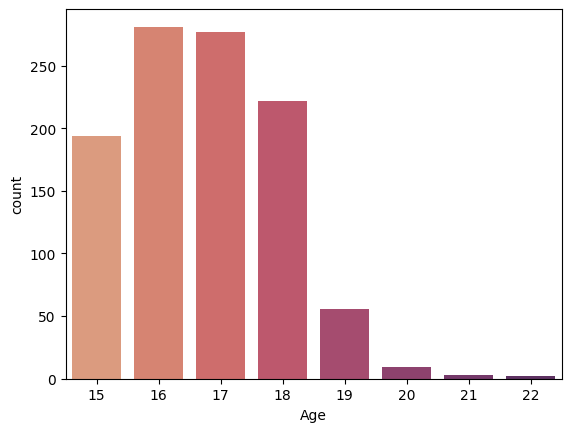

In [ ]:
#Checking The Age Column
sns.countplot(x=df['Age'], palette='flare')
plt.show()

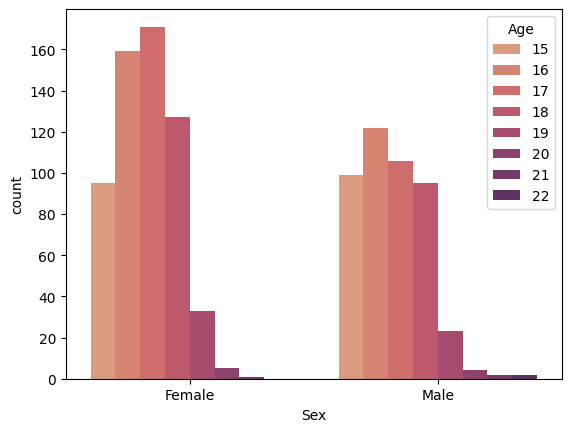

In [ ]:
sns.countplot(x='Sex', hue='Age', data=df, palette='flare')
plt.show()

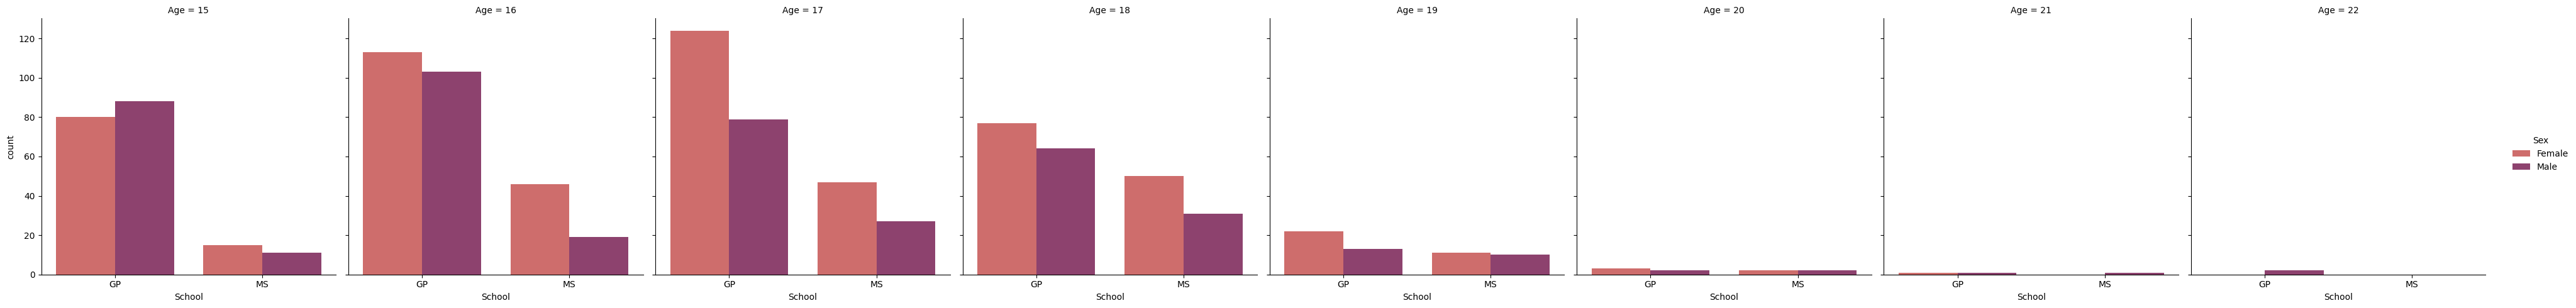

In [ ]:
sns.catplot(x='School', hue='Sex', col='Age', data=df, kind='count', palette='flare')
plt.show()

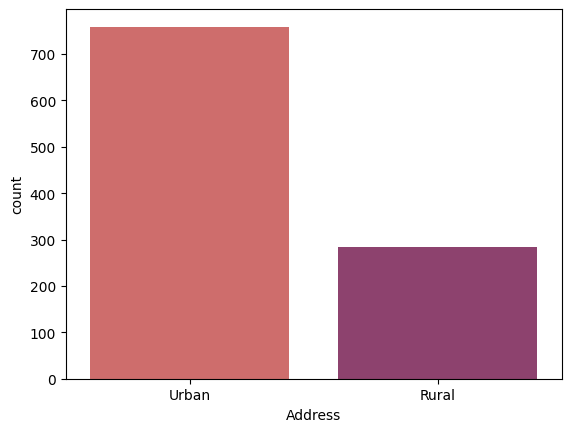

In [ ]:
#Checking The Address Column
mask_address = {'U':'Urban',
                'R':'Rural'}
df['Address'] = df['Address'].map(mask_address)
sns.countplot(x=df['Address'], palette='flare')
plt.show()

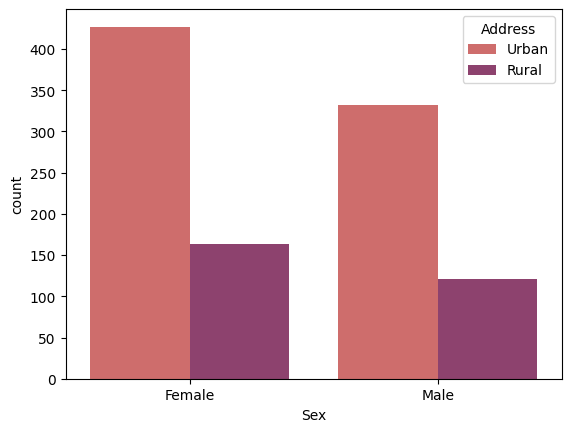

In [ ]:
sns.countplot(x='Sex', hue='Address', data=df, palette='flare')
plt.show()

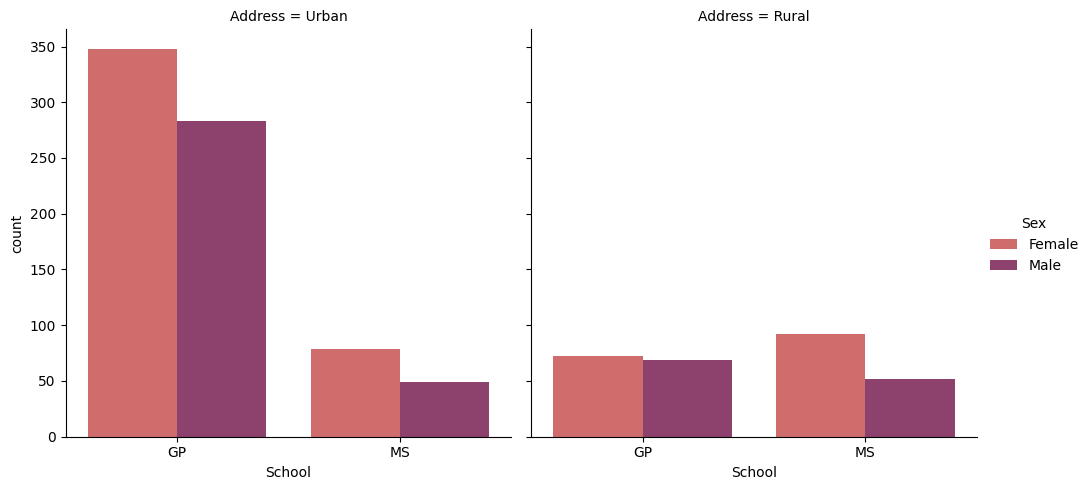

In [ ]:
sns.catplot(x='School', hue='Sex', col='Address', data=df, kind='count', palette='flare')
plt.show()

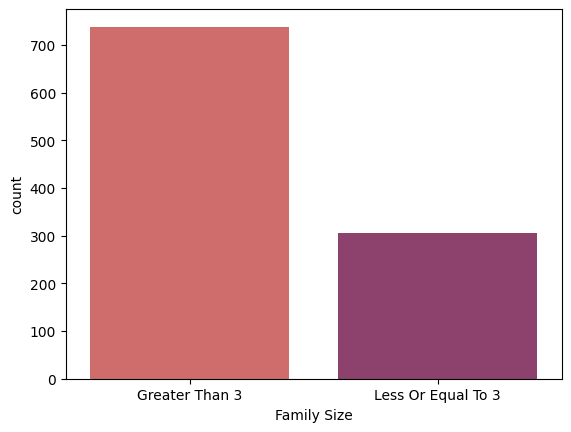

In [ ]:
#Checking The Family Size Column
mask_famsize = {'LE3':'Less Or Equal To 3',
                'GT3':'Greater Than 3'}
df['Family Size'] = df['Family Size'].map(mask_famsize)
sns.countplot(x=df['Family Size'], palette='flare')
plt.show()

**The next step is to build a machine learning model. between LinearRegression, DecissionTreeRegressor, RandomForestRegressor, Lasso, and Ridge.**

In [ ]:
#Label Conversion on The Dataset
print("\nLabel Conversion on The Dataset")
school = pd.get_dummies(df['School'], drop_first=True)
sex = pd.get_dummies(df['Sex'], drop_first=True)
address = pd.get_dummies(df['Address'], drop_first=True)
famsize = pd.get_dummies(df['Family Size'], drop_first=True)
pstatus = pd.get_dummies(df['Parent Cohabitation Status'], drop_first=True)
mjob = pd.get_dummies(df['Mother Job'], drop_first=True)
fjob = pd.get_dummies(df['Father Job'], drop_first=True)
reason = pd.get_dummies(df['Reason'], drop_first=True)
guardian = pd.get_dummies(df['Guardian'], drop_first=True)
schoolsup = pd.get_dummies(df['Extra Educational Support'], drop_first=True)
famsup = pd.get_dummies(df['Family Educational Support'], drop_first=True)
paid = pd.get_dummies(df['Extra Paid Course'], drop_first=True)
activities = pd.get_dummies(df['Extracurricular Activities'], drop_first=True)
nursery = pd.get_dummies(df['Attending Nursery School'], drop_first=True)
higher = pd.get_dummies(df['Wants To Take Higher Ed'], drop_first=True)
internet = pd.get_dummies(df['Internet Access'], drop_first=True)
romantic = pd.get_dummies(df['Romantic Relationship'], drop_first=True)

df = df.drop(['School',
              'Sex',
              'Address',
              'Family Size',
              'Parent Cohabitation Status',
              'Mother Job',
              'Father Job',
              'Reason',
              'Guardian',
              'Extra Educational Support',
              'Family Educational Support',
              'Extra Paid Course',
              'Extracurricular Activities',
              'Attending Nursery School',
              'Wants To Take Higher Ed',
              'Internet Access',
              'Romantic Relationship'], axis=1)

df = pd.concat([school,
                sex,
                address,
                famsize,
                pstatus,
                mjob,
                fjob,
                reason,
                guardian,
                schoolsup,
                famsup,
                paid,
                activities,
                nursery,
                higher,
                internet,
                romantic,
                df], axis=1)


Label Conversion on The Dataset


In [ ]:
#Separating Features and Labels
X = df.drop('Total Grade', axis=1)
y = df['Total Grade'].astype(int)

In [ ]:
#Preparing Training, Testing, And Validating Dataset
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

 Model：LinearRegression

In [ ]:
#Build a Machine Learning Model LinearRegression
from sklearn.linear_model import LinearRegression
model_linreg = LinearRegression()
model_linreg = model_linreg.fit(X_train, y_train)
y_pred_linreg = model_linreg.predict(X_test)

#Evaluating The Machine Learning Model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

#Mean Squared Error
mse = mean_squared_error(y_test, y_pred_linreg)
print('\nMean squared error dari Testing Set:', round(mse, 2))

#Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_linreg)
print('Mean absolute error dari Testing Set:', round(mae, 2))

#Root Mean Squared Error
rmse = np.sqrt(mse)
print('Root Mean Squared Error dari Testing Set:', round(rmse, 2))


Mean squared error dari Testing Set: 8.42
Mean absolute error dari Testing Set: 2.17
Root Mean Squared Error dari Testing Set: 2.9


 Model ：decision tree
 

In [ ]:
#Build a Machine Learning Model DecisionTree
from sklearn.tree import DecisionTreeRegressor
model_dtr = DecisionTreeRegressor(random_state=42)
model_dtr = model_dtr.fit(X_train, y_train)
y_pred_dtr = model_dtr.predict(X_test)

#Evaluating The Machine Learning Model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

#Mean Squared Error
mse = mean_squared_error(y_test, y_pred_dtr)
print('\nMean squared error dari Testing Set:', round(mse, 2))

#Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_dtr)
print('Mean absolute error dari Testing Set:', round(mae, 2))

#Root Mean Squared Error
rmse = np.sqrt(mse)
print('Root Mean Squared Error dari Testing Set:', round(rmse, 2))


Mean squared error dari Testing Set: 13.52
Mean absolute error dari Testing Set: 2.77
Root Mean Squared Error dari Testing Set: 3.68


Model: RandomForest

In [ ]:
#Build a Machine Learning Model RandomForest
from sklearn.ensemble import RandomForestRegressor
model_rfr = RandomForestRegressor(random_state=42)
model_rfr = model_rfr.fit(X_train, y_train)
y_pred_rfr = model_rfr.predict(X_test)

#Evaluating The Machine Learning Model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

#Mean Squared Error
mse = mean_squared_error(y_test, y_pred_rfr)
print('\nMean squared error dari Testing Set:', round(mse, 2))

#Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_rfr)
print('Mean absolute error dari Testing Set:', round(mae, 2))

#Root Mean Squared Error
rmse = np.sqrt(mse)
print('Root Mean Squared Error dari Testing Set:', round(rmse, 2))


Mean squared error dari Testing Set: 8.31
Mean absolute error dari Testing Set: 2.19
Root Mean Squared Error dari Testing Set: 2.88


model: lasso

In [ ]:
#Build a Machine Learning Model Lasso
from sklearn.linear_model import Lasso
model_lasso = Lasso(random_state=42)
model_lasso = model_lasso.fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_test)

#Evaluating The Machine Learning Model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

#Mean Squared Error
mse = mean_squared_error(y_test, y_pred_lasso)
print('\nMean squared error dari Testing Set:', round(mse, 2))

#Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_lasso)
print('Mean absolute error dari Testing Set:', round(mae, 2))

#Root Mean Squared Error
rmse = np.sqrt(mse)
print('Root Mean Squared Error dari Testing Set:', round(rmse, 2))


Mean squared error dari Testing Set: 10.41
Mean absolute error dari Testing Set: 2.58
Root Mean Squared Error dari Testing Set: 3.23


Model:Ridge

In [ ]:
#Build a Machine Learning Model Ridge
from sklearn.linear_model import Ridge
model_ridge = Ridge(random_state=42)
model_ridge = model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)

#Evaluating The Machine Learning Model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

#Mean Squared Error
mse = mean_squared_error(y_test, y_pred_ridge)
print('\nMean squared error dari Testing Set:', round(mse, 2))

#Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_ridge)
print('Mean absolute error dari Testing Set:', round(mae, 2))

#Root Mean Squared Error
rmse = np.sqrt(mse)
print('Root Mean Squared Error dari Testing Set:', round(rmse, 2))


Mean squared error dari Testing Set: 8.4
Mean absolute error dari Testing Set: 2.16
Root Mean Squared Error dari Testing Set: 2.9


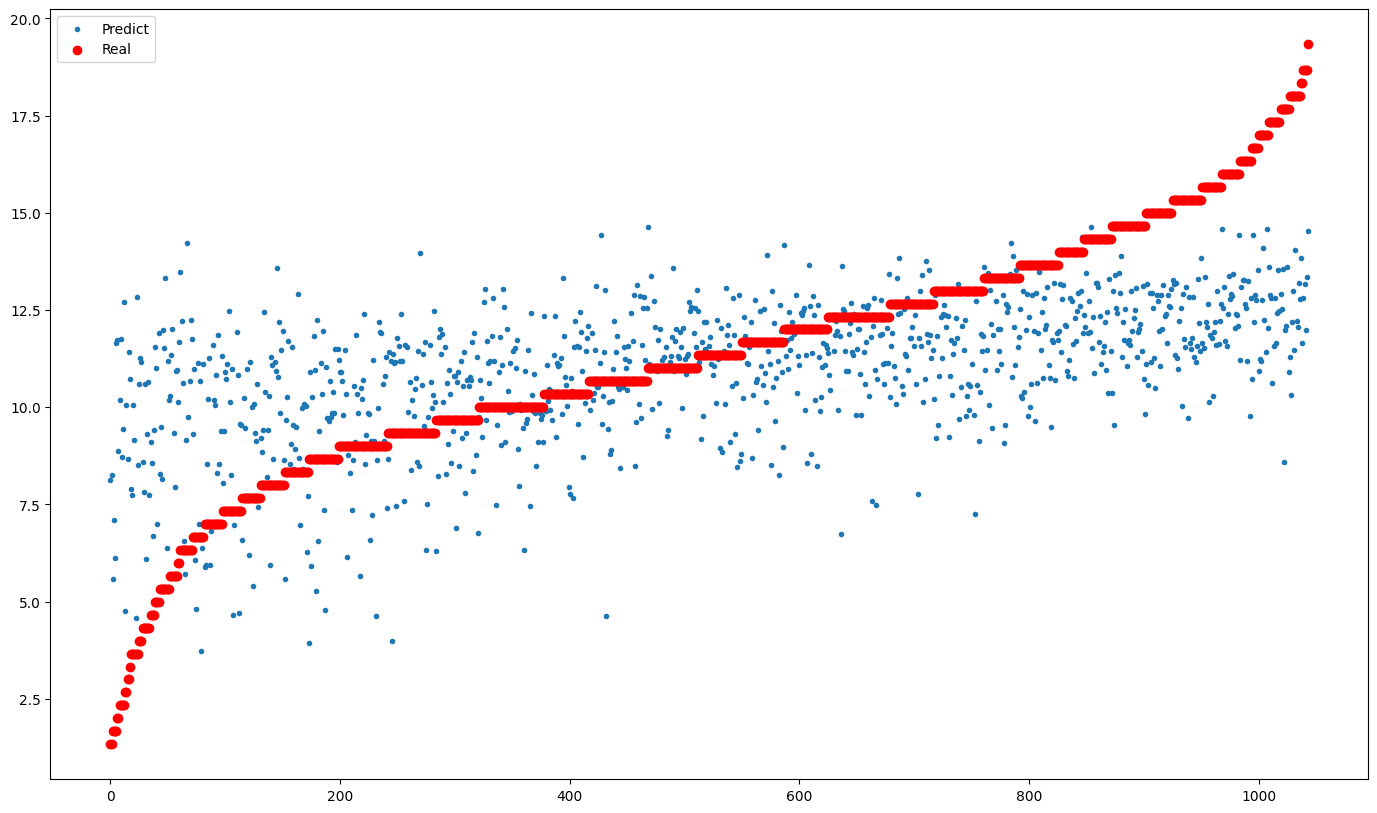

In [ ]:
#Visualize The Machine Learning Model
fig = plt.figure(figsize=(17, 10))
df = df.sort_values(by=['Total Grade'])
X = df.drop('Total Grade', axis=1)
y = df['Total Grade']
plt.scatter(range(X.shape[0]), model_ridge.predict(X), marker='.', label='Predict')
plt.scatter(range(X.shape[0]), y, color='red', label='Real')
plt.legend(loc='best', prop={'size': 10})
plt.show()

In [ ]:
#Validating The Machine Learning Model
for i in range(10):
    real = y_val.iloc[i]
    pred = int(model_ridge.predict(X_val.iloc[i].to_frame().T)[0])
    print(f'Real Value      ----->>>>> {real}\n'
          f'Predicted Value ----->>>>> {pred}')
    print()

Real Value      ----->>>>> 13
Predicted Value ----->>>>> 13

Real Value      ----->>>>> 9
Predicted Value ----->>>>> 7

Real Value      ----->>>>> 15
Predicted Value ----->>>>> 12

Real Value      ----->>>>> 14
Predicted Value ----->>>>> 13

Real Value      ----->>>>> 13
Predicted Value ----->>>>> 11

Real Value      ----->>>>> 13
Predicted Value ----->>>>> 11

Real Value      ----->>>>> 12
Predicted Value ----->>>>> 11

Real Value      ----->>>>> 6
Predicted Value ----->>>>> 12

Real Value      ----->>>>> 5
Predicted Value ----->>>>> 11

Real Value      ----->>>>> 14
Predicted Value ----->>>>> 13



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=924cabd48dad6804b0a285f4ea987c82f04a16bf6cbaf90fd04e0834bf6bf694
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


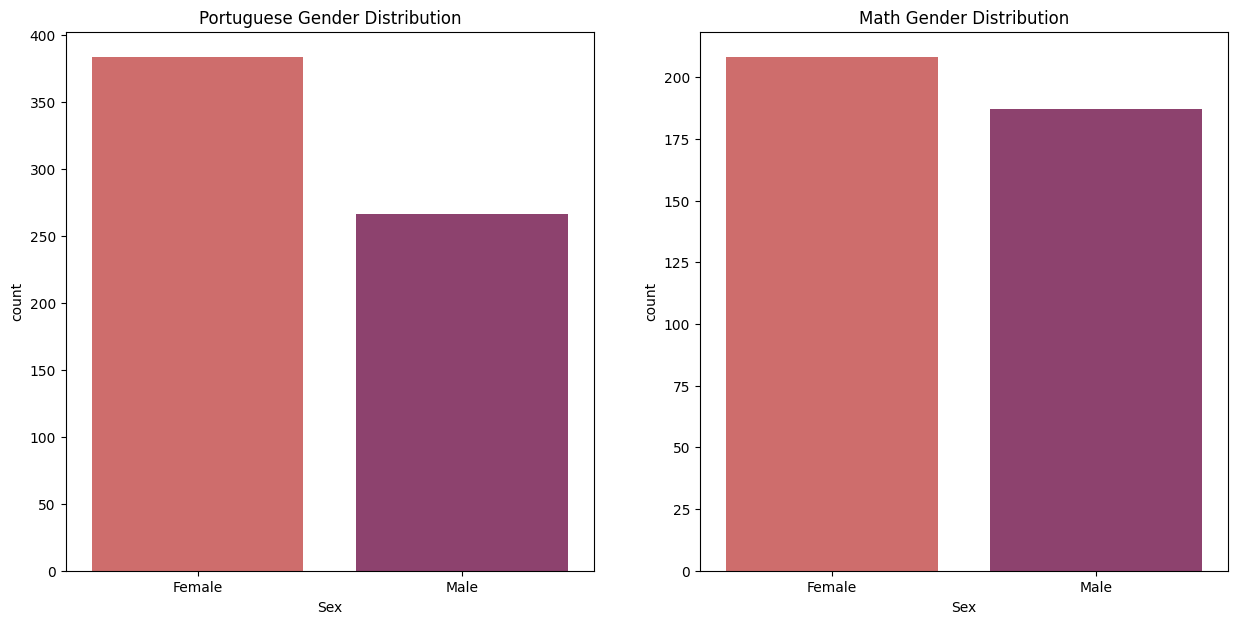

In [ ]:
!pip install pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import when
from pyspark.mllib.stat import Statistics
import matplotlib.pyplot as plt
import seaborn as sns

# Start a spark session
spark = SparkSession.builder.getOrCreate()

# Convert pandas dataframes to spark dataframes
df_mat_spark = spark.createDataFrame(df_mat)
df_por_spark = spark.createDataFrame(df_por)

# Mapping F to Female and M to Male
df_mat_spark = df_mat_spark.withColumn('Sex', when(df_mat_spark['Sex'] == 'F', 'Female').otherwise('Male'))
df_por_spark = df_por_spark.withColumn('Sex', when(df_por_spark['Sex'] == 'F', 'Female').otherwise('Male'))

# Convert back to pandas for visualization
df_mat_pd = df_mat_spark.toPandas()
df_por_pd = df_por_spark.toPandas()

# Plotting the gender distribution
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
sns.countplot(x=df_por_pd['Sex'], palette='flare', ax=ax[0])
ax[0].set_title('Portuguese Gender Distribution')

sns.countplot(x=df_mat_pd['Sex'], palette='flare', ax=ax[1])
ax[1].set_title('Math Gender Distribution')

plt.show()


**This code first converts the gender encoding from 'F'/'M' to 'Female'/'Male' in both Spark dataframes. Then it converts them back to pandas dataframes for visualization. The seaborn countplot is then used to show the gender distribution for both subjects.**

**calculate the mean of male and female students for the Portuguese and Math datasets.**

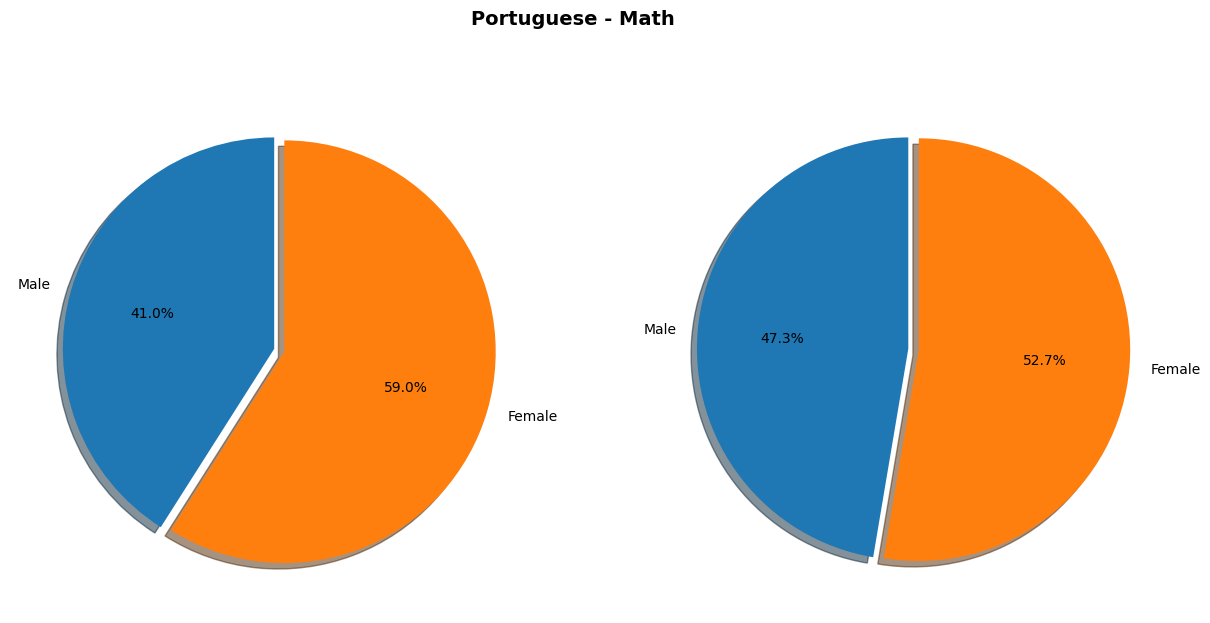

In [ ]:
from pyspark.sql import SparkSession
from pyspark.mllib.stat import Statistics
import matplotlib.pyplot as plt

# Start a spark session
spark = SparkSession.builder.getOrCreate()

# Convert pandas dataframes to spark dataframes
df_mat_spark = spark.createDataFrame(df_mat)
df_por_spark = spark.createDataFrame(df_por)

# Assuming 'Sex' column has 'M' for Male and 'F' for Female
features_math = df_mat_spark.select('Sex')
features_port = df_por_spark.select('Sex')

# Mapping M to 1 and F to 0
features_math = features_math.rdd.map(lambda x: (1,) if x[0] == 'M' else (0,))
features_port = features_port.rdd.map(lambda x: (1,) if x[0] == 'M' else (0,))

# Calculating the statistics
summary_math = Statistics.colStats(features_math)
summary_port = Statistics.colStats(features_port)

labels = ['Male', 'Female']
fracs_math = [summary_math.mean()[0], 1 - summary_math.mean()[0]]
fracs_port = [summary_port.mean()[0], 1 - summary_port.mean()[0]]
explode = (0, 0.05)

fig = plt.figure(figsize=(15, 7))
fig.suptitle('Portuguese - Math', fontsize=14, fontweight='bold')

# Portuguese
ax1 = fig.add_subplot(121)
ax1.pie(fracs_port, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

# Math
ax2 = fig.add_subplot(122)
ax2.pie(fracs_math, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()


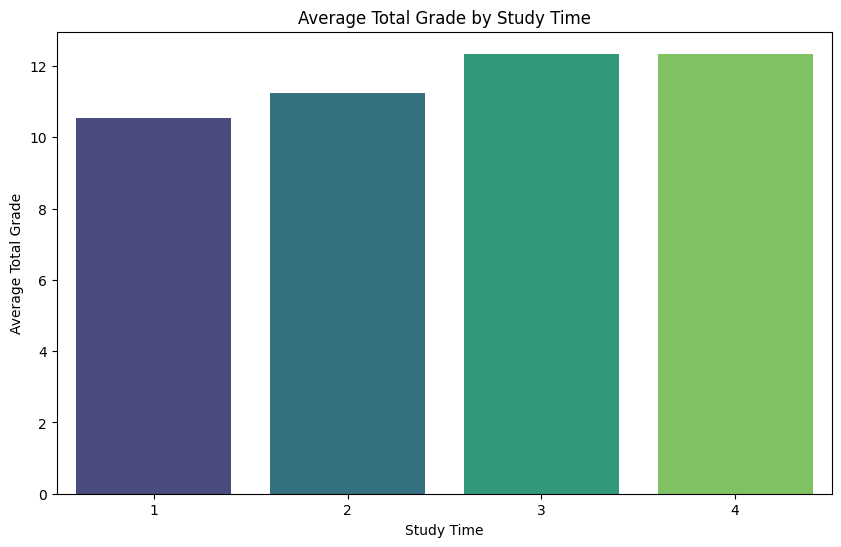

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating the average 'Total Grade' for each 'Study Time' category
avg_grades_per_studytime = df.groupby('Study Time')['Total Grade'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Study Time', y='Total Grade', data=avg_grades_per_studytime, palette='viridis')

plt.title('Average Total Grade by Study Time')
plt.xlabel('Study Time')
plt.ylabel('Average Total Grade')

plt.show()


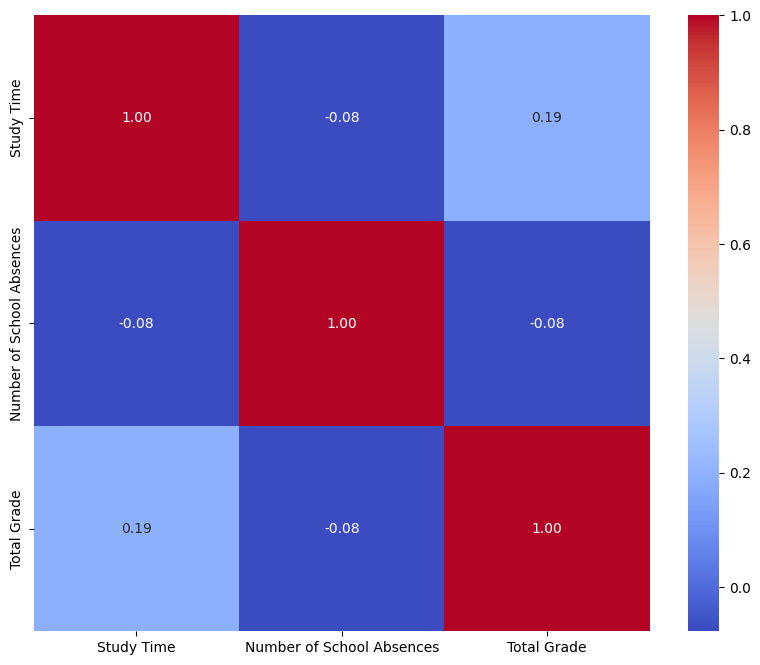

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant columns
df_subset = df[['Study Time', 'Number of School Absences', 'Total Grade']]

# Calculating correlations
corr = df_subset.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

plt.show()


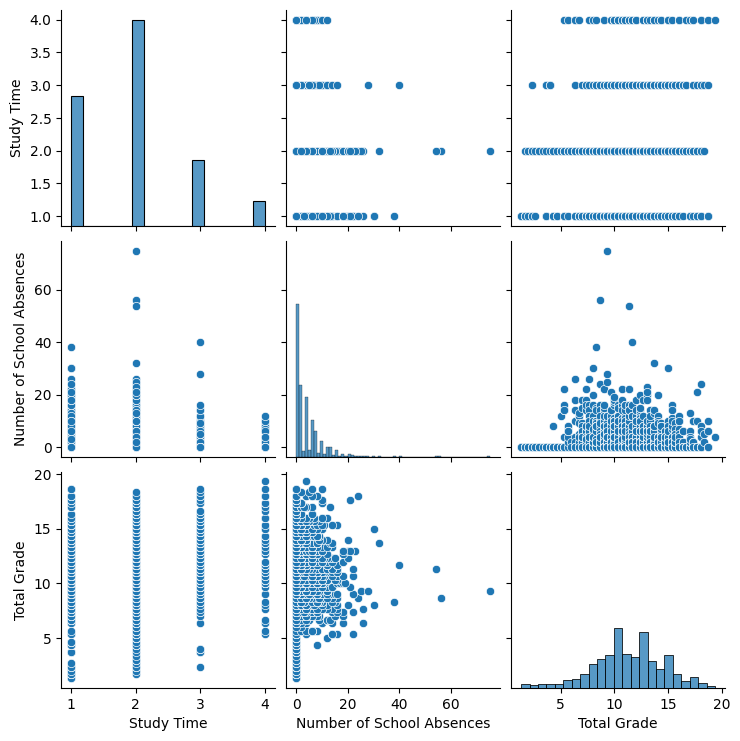

In [ ]:
# Plotting pairplot
sns.pairplot(df_subset)
plt.show()


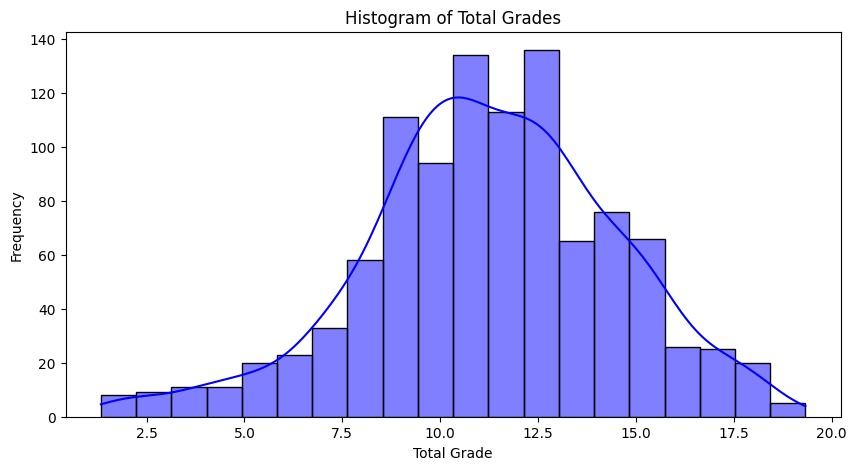

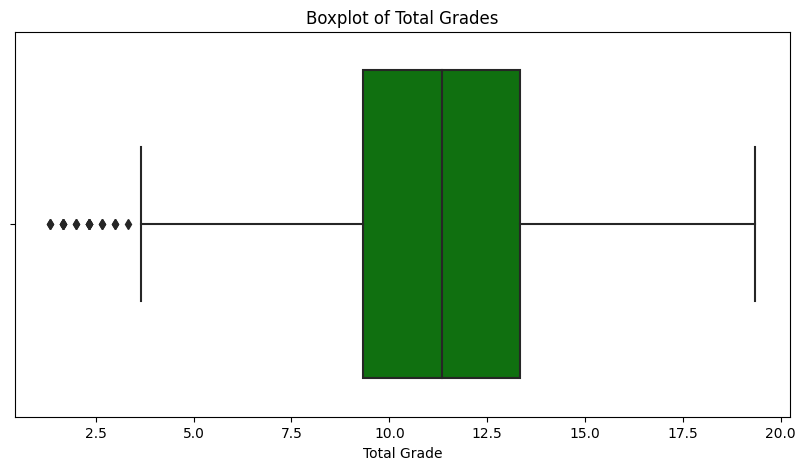

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df['Total Grade'], kde=True, bins=20, color='blue')
plt.title('Histogram of Total Grades')
plt.xlabel('Total Grade')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Total Grade'], color='green')
plt.title('Boxplot of Total Grades')
plt.xlabel('Total Grade')
plt.show()


In [ ]:
correlation = df['Number of School Absences'].corr(df['Total Grade'])
print(f"Correlation between 'Number of School Absences' and 'Total Grade': {correlation}")


Correlation between 'Number of School Absences' and 'Total Grade': -0.07722404780448906


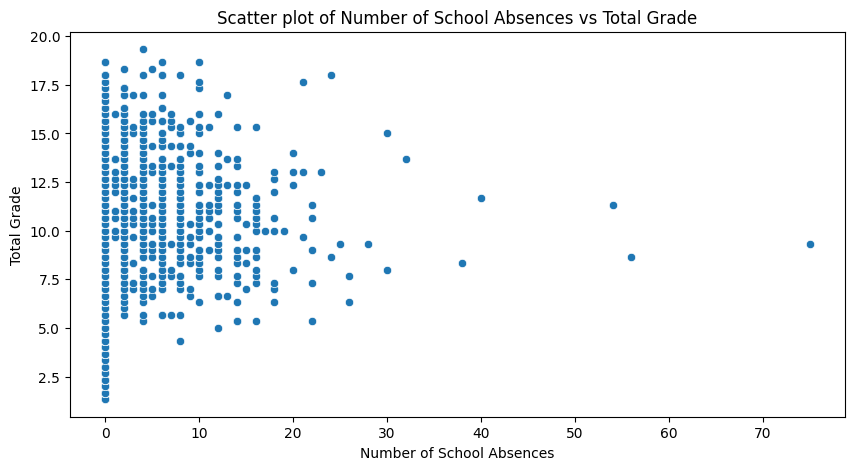

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Number of School Absences'], y=df['Total Grade'])
plt.title('Scatter plot of Number of School Absences vs Total Grade')
plt.xlabel('Number of School Absences')
plt.ylabel('Total Grade')
plt.show()


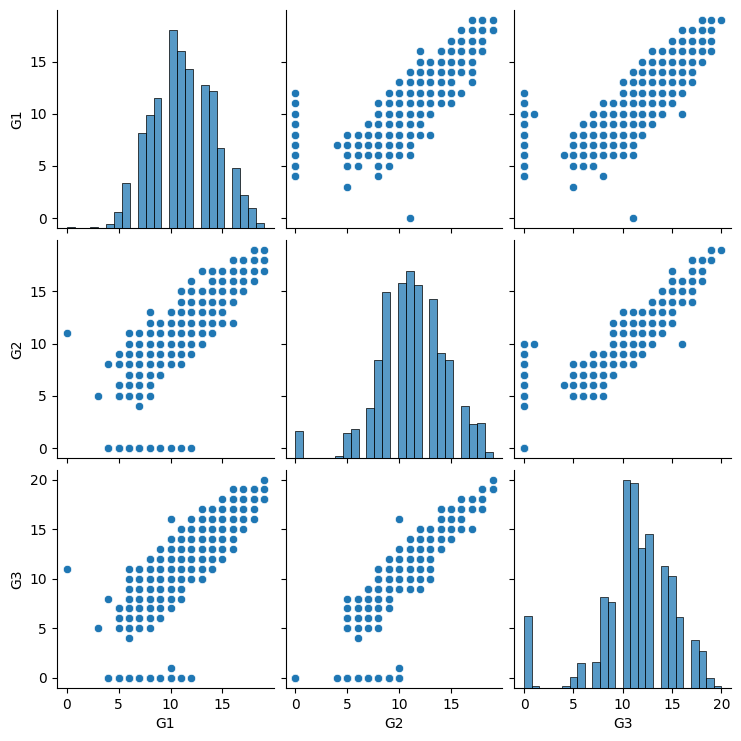

          G1        G2        G3
G1  1.000000  0.858739  0.809142
G2  0.858739  1.000000  0.910743
G3  0.809142  0.910743  1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot of G1, G2 and G3
sns.pairplot(df[['G1', 'G2', 'G3']])
plt.show()

# Correlation among 'G1', 'G2' and 'G3'
print(df[['G1', 'G2', 'G3']].corr())


RMSE:  1.725898744369487


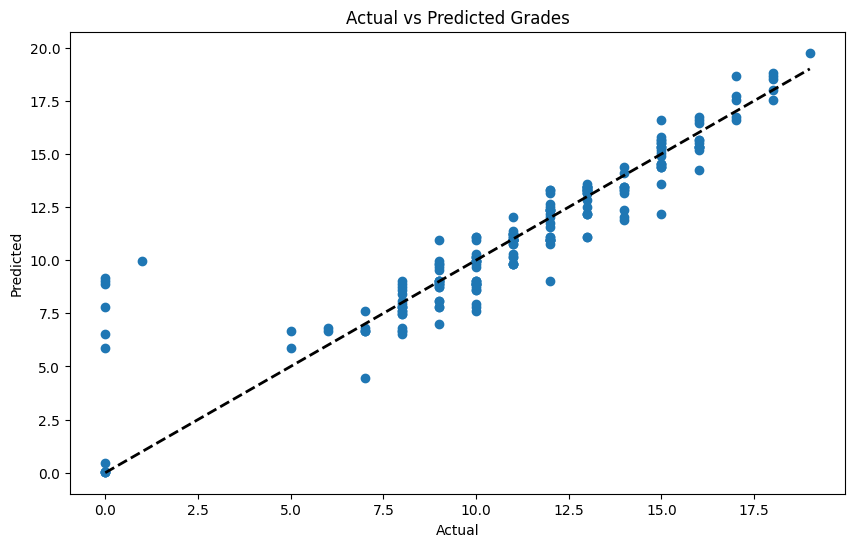

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Select features and target
features = df[['G1', 'G2']]
target = df['G3']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

# Visualize the predicted vs actual grades
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Grades')
plt.show()


The correlation between G1 and G2 is approximately 0.859, suggesting a very strong positive relationship. That is, students who perform well in G1 tend to also perform well in G2, and vice versa.
The correlation between G1 and G3 is approximately 0.809, suggesting a strong positive relationship. That is, students who perform well in G1 tend to also perform well in G3.

The correlation between G2 and G3 is approximately 0.911, suggesting a very strong positive relationship. That is, students who perform well in G2 tend to also perform well in G3. This is the strongest relationship among the three.
Please note that while correlation can suggest a relationship between variables, it does not imply causation. For instance, while these results suggest that students who perform well in G1 and G2 also perform well in G3, we can't say for sure that performing well in G1 and G2 causes better performance in G3. There might be other factors involved that aren't included in this analysis.